## GLOBAL

### Big file

In [3]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten/tree_pipkslamb__B4_M16_M18_FSflat_Spr-Fa18.root'

MCfileName_NOsignal = "/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018/root/trees/flatten/tree_pipkslamb__B4_M16_M18_genamp2_fall2018_FSflat.root"

MCfileName_NOsignalTHROWN = "/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018/root/thrown/flatten/tree_thrown_gen_amp_V2_FSflat_ALL.root"

# SIGNAL MC WITH t-slope
MCfileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal_man-t/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa2018.root'

# signal mc; w/t-slope; all plugins
MCfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/trees/flatten/tree_pipkslamb_sp-fa18_B4M16M18_genamp2_FSflat_ALLPLUGINS.root'

# signal mc; w/t-slope; only REACTION_FILTER plugin
MCfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/trees/flatten/tree_pipkslamb__sp-fa18_B4_M16_M18_gen_amp_V2_FSflat_REACTIONFILTER-ONLY.root'

THROWNfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_ALLPLUGINS.root'

THROWNfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_RXNfltrONLY.root'

treeName = 'ntFSGlueX_100000000_1100'

# metaData = 'Spring & Fall 2018. FSFlat.  B4__M16_M18'


### Little file

In [ ]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/data/fall2018/flatten/tree_pipkslamb__B4_M16_M18_FSFlat_small.root'
treeName = 'ntFSGlueX_100000000_1100'

######## ADDED BELOW FOR TESTING CODE THAT LOOKS FOR MONTE CARLO FILES ########

# # SIGNAL MC WITH t-slope
# MCfileName = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_signal_man-t/root/trees/flatten/tree_pipkslamb__B4_M16_M18_gen_amp_V2_FSflat_Spr-Fa2018.root'

# # signal mc; w/t-slope; all plugins
# MCfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/trees/flatten/tree_pipkslamb_sp-fa18_B4M16M18_genamp2_FSflat_ALLPLUGINS.root'

# # signal mc; w/t-slope; only REACTION_FILTER plugin
MCfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/trees/flatten/tree_pipkslamb__sp-fa18_B4_M16_M18_gen_amp_V2_FSflat_REACTIONFILTER-ONLY.root'

# THROWNfileNameALLPLUGINS = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test1/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_ALLPLUGINS.root'

# THROWNfileNameRXNPLUGINONLY = '/volatile/halld/home/dbarton/pipkslamb/mc/genamp2/fall2018_SBT_test2/root/thrown/flatten/tree_thrown_sp-fa18_gen_amp_V2_FSflat_RXNfltrONLY.root'

### Startup

In [4]:
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/work/halld/home/dbarton/gluex/KShortPipLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# DEFINE VARIABLES CORRESPOONDING TO THE INDICES
DecayingLambda = "1"
Proton = "1a"
PiMinus2 = "1b"
DecayingKShort = "2"
PiPlus2 = "2a"
PiMinus1 = "2b"
PiPlus1 = "3"
NegOne = "-1.*"

# THROWN TREE INDICES
# 1. Lambda4 (0)   1a. Proton5 (1)   1b. PiMinus6 (2)
# 2. KShort1 (3)   2a. PiPlus2 (4)   2b. PiMinus3 (5)
# 3. PiPlus0 (6)

#  - MCDecayParticle1
#  - MCDecayParticle2
#  - MCDecayParticle3
#  - MCDecayParticle4
#  - MCDecayParticle5
#  - MCDecayParticle6


################################ MANDELSTAM t VARIABLES ################################


# # ####### 1D t variables #######
# file = ROOT.TFile.Open(fileName)
# tree = file.Get(treeName)
# tree.SetAlias("mand_t", f"{NegOne}*MASS2(GLUEXTARGET,-{DecayingLambda})") # Define a new alias 'mand_t' on the tree
# ROOT.FSCut.defineCut("tRange","mand_t","0.0","0.25","-0.1","0.0","0.25","2.5")

# mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"
# ROOT.FSFit.defineVariable("mand_t", f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})")



# ####### 1D t variables #######
# mand_t = f"{NegOne}MASS2(GLUEXTARGET,-{DecayingLambda})"
# mand_t_k = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort})"
# mand_t_pi = f"{NegOne}MASS2(GLUEXBEAM,-{PiPlus1})"
# mand_t_kpi = f"{NegOne}MASS2(GLUEXBEAM,-{DecayingKShort},-{PiPlus1})"

# def mand_t0(I, J):
#     return f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"

# mand_tPrime_kpi = f"{mand_t_kpi} - ({mand_t0(DecayingKShort, PiPlus1)})"
# # mand_tPrime = 
# # mand_tPrime_k =
# # mand_tPrime_pi = 

# ####### 2D t variables #######
# mand_t_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
# mand_t_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

# mand_t0_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
# mand_t0_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

# mand_tPrime_kVSkpi = f"{mand_t_k}:{mand_t_kpi}"
# mand_tPrime_piVSkpi = f"{mand_t_pi}:{mand_t_kpi}"

########################################################################################

# CUSTOM 4-VECTORS

# from line 617: https://github.com/remitche66/FSRoot/blob/93bf25be31344a50fc1065e37017513ec56c8ced/FSBasic/FSTree.C#L617
 # defineFourVector("GLUEXBEAM","EnPB","PxPB","PyPB","PzPB");
 
 # dbarton 6/6/2025
ROOT.FSTree.defineFourVector("MCGLUEXBEAM","MCEnPB","MCPxPB","MCPyPB","MCPzPB");


# DEFINE CUTS
ROOT.FSCut.defineCut("rf","RFDeltaT", "-2.004","2.004", "-20.0","-6.0","6.0","20.0", 1./6.) # from Hao's kp pi0 channel.  Adjust for kspip
ROOT.FSCut.defineCut("chi2DOF","Chi2DOF","0.0","5.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8
ROOT.FSCut.defineCut("tRange",f"abs(MASS2(GLUEXTARGET,-{DecayingLambda})<1.0)")

ROOT.FSCut.defineCut("flightSigLambda","VeeLP1>2.0")
ROOT.FSCut.defineCut("flightSigKShort","VeeLP2>2.0") 
ROOT.FSCut.defineCut("constrainLambda",f"MASS({Proton},{PiMinus2})","1.1","1.132", "1.08", "1.1", "1.132", "1.22")
ROOT.FSCut.defineCut("constrainKShort",f"MASS({DecayingKShort})","0.49","0.51", "0.0", "0.49", "0.51", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR892",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR1430",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")
ROOT.FSCut.defineCut("constrainSigma2000", f"MASS({DecayingLambda},{PiPlus1})","2.0","3.5")

# Other cuts.  ARE THESE RIGHT???
ROOT.FSCut.defineCut("targetZ","ZVertex","-10.0","10.0") # Target Z
ROOT.FSCut.defineCut("missingMass2Lambda","MM2Lambda","-0.1","0.1") # 

# MissingMass2 for Lambda

def gluex_style():
    style = ROOT.TStyle("GlueX", "Default GlueX Style")

    style.SetCanvasBorderMode(0)
    style.SetPadBorderMode(0)
    style.SetPadColor(0)
    style.SetCanvasColor(0)
    style.SetTitleColor(0)
    style.SetStatColor(0)

    style.SetCanvasDefW(800)
    style.SetCanvasDefH(600)

    style.SetPadBottomMargin(0.15)
    style.SetPadLeftMargin(0.15)
    style.SetPadTopMargin(0.05)
    style.SetPadRightMargin(0.08)

    style.SetStripDecimals(0)
    style.SetLabelSize(0.055, "xyz")
    style.SetTitleSize(0.06, "xyz")
    style.SetTitleFont(42, "xyz")
    style.SetLabelFont(42, "xyz")
    style.SetTitleOffset(1.2, "y")
    style.SetLabelOffset(0.01, "xyz")

    style.SetOptStat(0)
    style.SetOptTitle(0)
    style.SetHistLineWidth(2)
    style.SetHistFillColor(920)  # grey

    # style.SetPadGridX(1)
    # style.SetPadGridY(1)

    style.SetPalette(ROOT.kViridis)

    style.cd()

atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| Saved aliases found in /app/PyAmpTools/src/pyamptools/.aliases.txt, attempting to load...
atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist un

### CAREFUL! Generate DATA histos

In [5]:
# ROOT.FSHistogram.clearHistogramCache("histos_pipkslamb")
# ROOT.FSHistogram.enableRDataFrame()

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# LAMBDA
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,rf)")
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,)&&CUTSB(rf)")

# KSHORT
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(50, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(50, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")

# K*
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(75, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange,rf)")
ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(75, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange)&&CUTSB(rf)")

# ROOT.FSHistogram.executeRDataFrame()
ROOT.FSHistogram.dumpHistogramCache("histos_pipkslamb")
# ROOT.FSHistogram.clearHistogramCache("histos_pipkslamb")

    CREATING HISTOGRAM... FSRootHist:000001   OKAY           (entries = 107452)
    CREATING HISTOGRAM... FSRootHist:000002   OKAY           (entries = 159819)
    CREATING HISTOGRAM... FSRootHist:000003   OKAY           (entries = 98961)
    CREATING HISTOGRAM... FSRootHist:000004   OKAY           (entries = 160952)
    CREATING HISTOGRAM... FSRootHist:000005   OKAY           (entries = 28510)
    CREATING HISTOGRAM... FSRootHist:000006   OKAY           (entries = 43378)
    FOUND HISTOGRAM...    FSRootHist:000001   OKAY           (entries = 107452)
    FOUND HISTOGRAM...    FSRootHist:000002   OKAY           (entries = 159819)
    FOUND HISTOGRAM...    FSRootHist:000003   OKAY           (entries = 98961)
    FOUND HISTOGRAM...    FSRootHist:000004   OKAY           (entries = 160952)
    FOUND HISTOGRAM...    FSRootHist:000005   OKAY           (entries = 28510)
    FOUND HISTOGRAM...    FSRootHist:000006   OKAY           (entries = 43378)


### CAREFUL!  Generate MC histos

In [3]:
# ROOT.FSHistogram.enableRDataFrame()

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# LAMBDA MC
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange)")
# ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange)&&CUTSB(rf)")

# KSHORT MC
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(50, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)")
# ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(50, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")

# K* MC
ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(75, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange)")
# ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(75, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange)&&CUTSB(rf)")

# ROOT.FSHistogram.executeRDataFrame()
ROOT.FSHistogram.dumpHistogramCache("histosMC_pipkslamb")
# ROOT.FSHistogram.clearHistogramCache("histosMC_pipkslamb")

    CREATING HISTOGRAM... FSRootHist:000001   OKAY           (entries = 14307)
    CREATING HISTOGRAM... FSRootHist:000002   OKAY           (entries = 16877)
    CREATING HISTOGRAM... FSRootHist:000003   OKAY           (entries = 11726)
    FOUND HISTOGRAM...    FSRootHist:000001   OKAY           (entries = 14307)
    FOUND HISTOGRAM...    FSRootHist:000002   OKAY           (entries = 16877)
    FOUND HISTOGRAM...    FSRootHist:000003   OKAY           (entries = 11726)


### Load DATA histograms

In [ ]:
ROOT.FSHistogram.readHistogramCache("/work/halld/home/dbarton/gluex/KShortPipLambda/histos_pipkslamb")


# POSSIBLE CUTS
# rf,chi2DOF,unusedE,unusedTracks,coherentPeak,tRange,flightSigLambda,flightSigKShort,constrainLambda,constrainKShort,constrainKSTAR892,constrainKSTAR1430,constrainSigma2000
cutsKS = "rf,chi2DOF,unusedE,unusedTracks,coherentPeak,tRange,flightSigKShort,constrainKShort"
cutsLAMB = "rf,chi2DOF,unusedE,unusedTracks,coherentPeak,tRange,flightSigLambda,constrainLambda"
cutsKSPIP = "rf,chi2DOF,unusedE,unusedTracks,coherentPeak,tRange,flightSigLambda,flightSigKShort,constrainLambda,constrainKShort,constrainKSTAR892"

# LAMBDA
hist_lamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", f"CUT({cutsLAMB})")
hist_lamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", f"CUT({cutsLAMB})&&CUTSB(rf)")
hist_lamb_reduced = hist_lamb_prompt.Clone("hist_lamb_reduced")
hist_lamb_reduced.Add(hist_lamb_OUTATIMEsb, -1)

# # KSHORT
# hist_ks_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
# hist_ks_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")
# hist_ks_reduced = hist_ks_prompt.Clone("hist_ks_reduced")
# hist_ks_reduced.Add(hist_ks_OUTATIMEsb, -1)

# # K*
# hist_k892_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange,rf)")
# hist_k892_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange)&&CUTSB(rf)")
# hist_k892_reduced = hist_k892_prompt.Clone("hist_k892_reduced")
# hist_k892_reduced.Add(hist_k892_OUTATIMEsb, -1)

# # DALITZ PLOTS
# dalitz_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
# dalitz_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
# dalitz_kspipVSlambpip_reduced = dalitz_kspipVSlambpip_prompt.Clone("dalitz_kspipVSlambpip_reduced")
# dalitz_kspipVSlambpip_reduced.Add(dalitz_kspipVSlambpip_OUTATIMEsb, -1)


# # 2_DIMENSIONAL PLOTS
# twoD_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
# twoD_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
# twoD_kspipVSlambpip_reduced = twoD_kspipVSlambpip_prompt.Clone("twoD_kspipVSlambpip_reduced")
# twoD_kspipVSlambpip_reduced.Add(twoD_kspipVSlambpip_OUTATIMEsb, -1)

ROOT.FSHistogram.clearHistogramCache("histos_pipkslamb")

# FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
# h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

READING CACHE: /work/halld/home/dbarton/gluex/KShortPipLambda/histos_pipkslamb
    root file = /work/halld/home/dbarton/gluex/KShortPipLambda/histos_pipkslamb.cache.root
    data file = /work/halld/home/dbarton/gluex/KShortPipLambda/histos_pipkslamb.cache.dat
FSHistogram:  READ HISTOGRAM...          FSRootHist:000001   OKAY           (entries = 107452)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000002   OKAY           (entries = 159819)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000003   OKAY           (entries = 98961)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000004   OKAY           (entries = 160952)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000005   OKAY           (entries = 28510)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000006   OKAY           (entries = 43378)
    FOUND HISTOGRAM...    FSRootHist:000001   OKAY           (entries = 107452)
    FOUND HISTOGRAM...    FSRootHist:000002   OKAY           (entries = 159819)
    CREATING 

### Load MC histograms

In [ ]:
ROOT.FSHistogram.readHistogramCache("/work/halld/home/dbarton/gluex/KShortPipLambda/histosMC_pipkslamb")

# LAMBDA MC
histMC_lamb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange)")
# histMC_lamb_prompt = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,rf)")
# histMC_lamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,tRange,)&&CUTSB(rf)")
# histMC_lamb_reduced = histMC_lamb_prompt.Clone("histMC_lamb_reduced")
# histMC_lamb_reduced.Add(histMC_lamb_OUTATIMEsb, -1)

# KSHORT MC
histMC_ks = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)")
# histMC_ks_prompt = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange,rf)")
# histMC_ks_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort})", "(100, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,tRange)&&CUTSB(rf)")
# histMC_ks_reduced = histMC_ks_prompt.Clone("histMC_ks_reduced")
# histMC_ks_reduced.Add(histMC_ks_OUTATIMEsb, -1)

# K* MC
histMC_k892 = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange)")
# histMC_k892_prompt = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange,rf)")
# histMC_k892_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileNameRXNPLUGINONLY, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.6, 2.00)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,tRange)&&CUTSB(rf)")
# histMC_k892_reduced = histMC_k892_prompt.Clone("histMC_k892_reduced")
# histMC_k892_reduced.Add(histMC_k892_OUTATIMEsb, -1)

# DALITZ MC
dalitzMC_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
dalitzMC_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(100, 0.0, 14.0, 100, 0.0, 9.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKShort,constrainLambda)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
dalitzMC_kspipVSlambpip_reduced = dalitzMC_kspipVSlambpip_prompt.Clone("dalitzMC_kspipVSlambpip_prompt")
dalitzMC_kspipVSlambpip_reduced.Add(dalitzMC_kspipVSlambpip_OUTATIMEsb, -1)

# 2_DIMENSIONAL PLOTS MC
two2dMC_kspipVSlambpip_prompt = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
two2dMC_kspipVSlambpip_OUTATIMEsb = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1}):MASS({DecayingLambda},{PiPlus1})", "(100, 1.0, 4.0, 100, 0.2, 3.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
two2dMC_kspipVSlambpip_reduced = two2dMC_kspipVSlambpip_prompt.Clone("two2dMC_kspipVSlambpip_prompt")
two2dMC_kspipVSlambpip_reduced.Add(two2dMC_kspipVSlambpip_OUTATIMEsb, -1)

ROOT.FSHistogram.clearHistogramCache("histosMC_pipkslamb")

# FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
# h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

READING CACHE: /work/halld/home/dbarton/gluex/KShortPipLambda/histosMC_pipkslamb
    root file = /work/halld/home/dbarton/gluex/KShortPipLambda/histosMC_pipkslamb.cache.root
    data file = /work/halld/home/dbarton/gluex/KShortPipLambda/histosMC_pipkslamb.cache.dat
FSHistogram:  READ HISTOGRAM...          FSRootHist:000001   OKAY           (entries = 14307)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000002   OKAY           (entries = 16877)
FSHistogram:  READ HISTOGRAM...          FSRootHist:000003   OKAY           (entries = 11726)
    FOUND HISTOGRAM...    FSRootHist:000001   OKAY           (entries = 14307)
    CREATING HISTOGRAM... FSRootHist:000004   OKAY           (entries = 16877)
    CREATING HISTOGRAM... FSRootHist:000005   OKAY           (entries = 11726)


### Load MAND_T plots

In [ ]:
# MOMENTUM TRANSFER
hist_mandt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"{NegOne}MASS(GLUEXBEAM, {})", "(80, 0.0, 2.0)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,flightSigKShort)")

# MOMENTUM TRANSFER - OTHER
hist_mandt_1D_kpi_DATA = ROOT.FSHistogram.getTH1F(fileName, treeName, f"{NegOne}MASS(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MASS(GLUEXBEAM, -{PiPlus1})")
hist_mandt_1D_kpi_ACCEPTED = ROOT.FSHistogram.getTH1F(THROWNfileNameRXNPLUGINONLY, treeName, f"{NegOne}MCMASS(MCGLUEXBEAM, -{DecayingKShort}) - {NegOne}MCMASS(MCGLUEXBEAM, -{PiPlus1})")
hist_mandt_1D_kpi_THROWN = ROOT.FSHistogram.getTH1F(THROWNfileNameRXNPLUGINONLY, treeName, f"{NegOne}MCMASS(MCGLUEXBEAM, -{DecayingKShort}) - {NegOne}MCMASS(MCGLUEXBEAM, -{PiPlus1})")

# MOMENTUM TRANSFER - 2 DIMENSIONAL
# AXES FOR 2D PLOTS WITH FSROOT: MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
hist_mandt_2D_kpi_DATA = ROOT.FSHistogram.getTH2F(fileName, treeName, f"{NegOne}MASS2(GLUEXBEAM, -{DecayingKShort}) - {NegOne}MASS2(GLUEXBEAM, -{PiPlus1}):MASS({DecayingKShort},{PiPlus1})", "(125, 0.5, 3.0, 350, -7.0, 7.0)", "CUT()")
hist_mandt_2D_kpi_ACCEPTED = ROOT.FSHistogram.getTH2F(THROWNfileNameRXNPLUGINONLY, treeName, f"{NegOne}MCMASS2(MCGLUEXBEAM, -{DecayingKShort}) - {NegOne}MCMASS2(MCGLUEXBEAM, -{PiPlus1}):MCMASS({DecayingKShort},{PiPlus1})", "(125, 0.5, 3.0, 350, -7.0, 7.0)", "CUT()")
hist_mandt_2D_kpi_THROWN = ROOT.FSHistogram.getTH2F(THROWNfileNameRXNPLUGINONLY, treeName, f"{NegOne}MCMASS2(MCGLUEXBEAM, -{DecayingKShort}) - {NegOne}MCMASS2(MCGLUEXBEAM, -{PiPlus1}):MCMASS({DecayingKShort},{PiPlus1})", "(125, 0.5, 3.0, 350, -7.0, 7.0)", "CUT()")

### Load OTHER Histograms

In [ ]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# BEAM ENERGY
hist_beamEnergy = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
hist_beamEnergy_meas = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")

# dE/dx


# RFDeltaT
hist_RFDeltaT_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, "RFDeltaT", (300, -18.0, 18.0), "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda,rf)")
hist_RFDeltaT_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, "RFDeltaT", (300, -18.0, 18.0), "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)&&CUTSB(rf)")

# MASS VS. MEASURED_ENERGY -- straight diagonal line indicates no dependence on kinfit, i.e. the mass is NOT dependent on the kinematic fitter.  Deviations may indicate need to tweak kinematic fitter (expert).
hist_massVSenergy_meas = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({PiPlus2},{PiMinus1}):(RENERGY({PiPlus2})/RENERGY({PiMinus1}))", "(100, 0.05, 9.0, 100, 0.26, 1.2)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"    
# h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({DecayingLambda}):(RENERGY({Proton})/RENERGY({PiMinus2}))", "(100, 0.05, 9.0, 100, 0.26, 1.2)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"

# FLIGHT SIG.
hist_flightSig = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(flightSigKShort)&&MAXEVENTS==10000")

# CHI2/DOF 2D
hist_chi2DOF_2D = ROOT.FSHistogram.getTH2F(fileName, treeName, "Chi2DOF:Event", "(60,0.0,155000000.0,60,0.0,10.0)", "")

# CHI2/DOF 1D
hist_chi2DOF_1D = ROOT.FSHistogram.getTH1F(fileName, treeName, "chi2DOF", "(80,0.0,10.0)", "CUT()")

# kShort Lambda
hist_ksLamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
hist_ksLamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
hist_ksLamb_reduced = hist_ksLamb_prompt - hist_ksLamb_OUTATIMEsb

histMC_ksLamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
histMC_ksLamb_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")
histMC_ksLamb_reduced = histMC_ksLamb_prompt - histMC_ksLamb_OUTATIMEsb

# PiPlus1
hist_pip1_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
hist_pip1_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
hist_pip1_reduced = hist_pip1_prompt - hist_pip1_OUTATIMEsb

histMC_pip1_prompt = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
histMC_pip1_OUTATIMEsb = ROOT.FSHistogram.getTH1F(MCfileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainLambda)")
histMC_pip1_reduced = histMC_pip1_prompt - histMC_pip1_OUTATIMEsb


# TARGET PROTON
hist_targetP_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
hist_targetP_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
hist_targetP_recuced = hist_targetP_prompt - hist_targetP_OUTATIMEsb

# TARGET PROTON MC
histMC_targetP_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
histMC_targetP_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS(GLUEXTARGET)", "(80, 0.0, 4.0)", "")
histMC_targetP_recuced = histMC_targetP_prompt - histMC_targetP_OUTATIMEsb


# FINAL STATE PARTICLES: KS, PIP, P, PIM
hist_allFinalParts_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
hist_allFinalParts_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
hist_allFinalParts_reduced = hist_allFinalParts_prompt - hist_allFinalParts_OUTATIMEsb

# FINAL STATE PARTICLES: KS, PIP, P, PIM (MONTE CARLO)
histMC_allFinalParts_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
histMC_allFinalParts_OUTATIMEsb = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")
histMC_allFinalParts_reduced = histMC_allFinalParts_prompt - histMC_allFinalParts_OUTATIMEsb


# FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
# h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

### Functions 1

In [ ]:
### FSROOT #####

# write FSFunction to do fit using FSRoot fitting utilities.  See here:
# https://github.com/remitche66/FSRoot/blob/93bf25be31344a50fc1065e37017513ec56c8ced/FSFit/FSFitUtilities.h#L43

# SOURCE CODE:

# FSFitGAUS(TString n_fName, double n_xLow, double n_xHigh) :
#       FSFitFunction(n_fName,n_xLow,n_xHigh){ 
#       addParameter("N",10.0,"size");
#       addParameter("M",10.0,"mean");
#       addParameter("W",10.0,"width");
#     }

# hist_lamb_prompt = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(64, 1.1, 1.132)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigLambda,constrainKSTAR892,tRange,rf)")

# TRYING THIS:
# ROOT.FSFitUtilities.createFunction.FSFitGAUS("FSgaus",0.0,20.0));





# # Create the FSFitGAUS function
# FSgauss = ROOT.FSFitGAUS("mygauss", 1.1, 1.132)

# FSgauss.addParameter("N", 100.0)
# FSgauss.addParameter("M", 1.116)
# FSgauss.addParameter("W", 0.004)

# defineGauss = ROOT.FSFitUtilities.createFunction(ROOT.FSFitGAUS("gausFunction",0.0,20.0))
 
# ROOT.FSFitUtilities.createFunction(ROOT.FSFitGAUS("gausFunction",0.0,20.0))
# ROOT.FSFitUtilities.setParameter("gausFunction:N",10.0) # amplitude?
# ROOT.FSFitUtilities.setParameter("gausFunction:M",10.0)
# ROOT.FSFitUtilities.setParameter("gausFunction:W",10.0)
# ROOT.FSFitUtilities.createFunction("gf", "gausFunction")
# ROOT.FSFitUtilities.getTF1("gf", "gausFunction")


### cpp #####

# std::unique_ptr<TF1> bw = std::make_unique<TF1>("bw", "breitwigner(0)", 1.2, 1.7); # alt. func. "BreitWigner(x, [4], [5])"
# bw->SetParName(0, "bw_amplitude");
# bw->SetParName(1, "bw_mass");
# bw->SetParName(2, "bw_width");

# bw->SetParameter(0, fitCombined->GetParameter("bw_amplitude")); // 
# bw->SetParameter(1, fitCombined->GetParameter("bw_mass")); // 
# bw->SetParameter(2, fitCombined->GetParameter("bw_width")); // 
# bw->SetLineColor(kCyan);
# bw->SetLineWidth(2);
# bw->SetLineStyle(2);

# bw->Draw("same");

### PYTHON #####

    # fb = ROOT.TF1("fb","gaus(0)",0.3,0.7)
    # fb.SetParName(0, "gaus_amplitude")
    # fb.SetParName(1, "gaus_mean")
    # fb.SetParName(2, "gaus_width")
    # fb.SetParameter("gaus_amplitude", 680)
    # # fb.SetParameter("gauss_amplitude", h1.GetMaximum())
    # fb.SetParameter("gaus_mean", 0.497)
    # fb.SetParameter("gaus_width", 0.01)
    # fb.SetLineColor(ROOT.kRed)
    # fb.SetLineWidth(2)
    # fb.SetLineStyle(2)
    # fb.Draw("same")
        
    # fb.SetParLimits(0, 0, 100000)
    # fb.SetParLimits(1, 0.49, 0.51)
    # fb.SetParLimits(2, 0.0, 0.05)

    # fb.SetNpx(1000)
    # fb.SetRange(0.45, 0.55)
    # fb.SetParameter(0, h1.GetMaximum())

### Functions 2

In [ ]:
canvas = ROOT.TCanvas('c', 'c', 800, 600)
canvas.SetLeftMargin(0.15)

fb = ROOT.TF1("fb","gaus(0)",0.3,0.7) # functionLabel, function, x_min, x_max
fb.SetParName(0, "gaus_amplitude")
fb.SetParName(1, "gaus_mean")
fb.SetParName(2, "gaus_width")
fb.SetParameter("gaus_amplitude", 0.7)
# fb.SetParameter("gauss_amplitude", h1.GetMaximum())
fb.SetParameter("gaus_mean", 0.497)
fb.SetParameter("gaus_width", 0.05)
fb.GetXaxis().SetTitle("Mass (GeV/c^{2})")
fb.GetYaxis().SetTitle("Events")
fb.SetTitle("Gaussian Function")
# fb.SetRange(0.4, 0.6)
# fb.SetNpx(1000)
fb.SetLineColor(ROOT.kRed)
fb.SetLineWidth(2)
fb.SetLineStyle(2)
fb.Draw()

img_path = 'plots/bwTEST_m'
canvas.SaveAs(img_path + '.pdf')
canvas.SaveAs(img_path + '.png')
canvas.Close()
display(Image(filename=img_path + '.png'))
os.remove(img_path + '.png')


### Trees

In [12]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(THROWNfileNameRXNPLUGINONLY)


Tree Name: ntFSGlueX_100000000_1100
Branches:
 - Run
 - Event
 - MCPxPB
 - MCPyPB
 - MCPzPB
 - MCEnPB
 - MCVxPB
 - MCVyPB
 - MCVzPB
 - MCDecayCode1
 - MCDecayCode2
 - MCExtras
 - MCDecayParticle1
 - MCDecayParticle2
 - MCDecayParticle3
 - MCDecayParticle4
 - MCDecayParticle5
 - MCDecayParticle6
 - MCPxP1
 - MCPyP1
 - MCPzP1
 - MCEnP1
 - MCPxP1a
 - MCPyP1a
 - MCPzP1a
 - MCEnP1a
 - MCVxP1a
 - MCVyP1a
 - MCVzP1a
 - MCPxP1b
 - MCPyP1b
 - MCPzP1b
 - MCEnP1b
 - MCVxP1b
 - MCVyP1b
 - MCVzP1b
 - MCPxP2
 - MCPyP2
 - MCPzP2
 - MCEnP2
 - MCPxP2a
 - MCPyP2a
 - MCPzP2a
 - MCEnP2a
 - MCVxP2a
 - MCVyP2a
 - MCVzP2a
 - MCPxP2b
 - MCPyP2b
 - MCPzP2b
 - MCEnP2b
 - MCVxP2b
 - MCVyP2b
 - MCVzP2b
 - MCPxP3
 - MCPyP3
 - MCPzP3
 - MCEnP3
 - MCVxP3
 - MCVyP3
 - MCVzP3


## HISTO TEMPLATES

### standard

### 4x4

In [ ]:
from IPython.display import Image, display
import ROOT, os

latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'RFDeltaT (ns)'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():
    gluex_style()
    ROOT.gStyle.SetOptStat(1111)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 900, 900)
    canvas.Divide(2, 2)

    histograms = [h1, h2, h3, h4]
    titles = [
        "Prompt",
        "Positive tail",
        "Negative tail",
        "Full range"
    ]

    colors = [ROOT.kBlue, ROOT.kRed+1, ROOT.kGreen+2, ROOT.kBlack]

    legends = []

    for i, (hist, title, color) in enumerate(zip(histograms, titles, colors), start=1):
        canvas.cd(i)
        hist.SetLineColor(color)
        hist.GetYaxis().SetTitle("events")
        hist.GetXaxis().SetTitle(axisLabel)
        hist.SetTitle(title)
        hist.Draw("hist")

        if i == 1:
            # h_bg.Draw("hist same")
            h2.Draw("hist same")
            h3.Draw("hist same")
            legend1 = ROOT.TLegend(0.60, 0.86, 0.98, 0.98)
            legend1.AddEntry(hist, "Prompt signal", "l")
            legend1.AddEntry(h3, "Neg. out-of-time (x 4/16)", "l")
            legend1.AddEntry(h2, "Pos. out-of-time (x 4/16)", "l")

        elif i == 4:
            h4.Draw("hist same")
            legend1 = ROOT.TLegend(0.60, 0.86, 0.92, 0.98)
            legend1.AddEntry(h4, "Full range", "l")
            legend1.AddEntry(h4, "Not scaled", "l")
        else:
            legend1 = ROOT.TLegend(0.67, 0.86, 0.92, 0.98)
            legend1.AddEntry(hist, title, "l")
            legend1.AddEntry(hist, "(scaled 4/16)", "")

        legend1.Draw("same")
        legends.append(legend1)  # Prevent garbage collection



    canvas.cd(0)
    img_path = 'plots/RF_deltaT_all4'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()


## MOMENTUM TRANSFER

### t-slope

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Momentum transfer'
axisLabel = '-(p_{p} - p_{\Lambda})^{2} [GeV^{2}]'


# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)


    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineStyle(2)
    h1.SetLineWidth(5)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle('t_{(\Lambda)} (GeV^{2})')
    h1.GetYaxis().SetTitle('Events (log)')
    h1.GetYaxis().SetRangeUser(1.,10E+04)
    h1.Draw('hist')


    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle('t_{(K_{s} \pi^{+})} (GeV^{2})')
    h2.GetYaxis().SetTitle('Events (log)')
    h2.GetYaxis().SetRangeUser(1.,10E+04)
    h2.Draw('same, hist')

    # exp = ROOT.TF1("exp","expo(3)",0.0,2.0) # functionLabel, function, x_min, x_max
    # # exp.SetParName(3, "exp_offset")
    # # exp.SetParName(4, "exp_decay")
    # exp.SetParameter(3, 4.42)
    # exp.SetParameter(4, -1.30)
    # exp.SetLineColor(ROOT.kRed)
    # exp.SetLineWidth(2)
    # exp.SetLineStyle(2)
    # exp.Draw('same')
    
    legend1 = ROOT.TLegend(0.55, 0.80, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1,'mand_t_lamb', 'l')
    legend1.AddEntry(h2,'mand_t_kpi', 'l')
    # legend1.AddEntry(exp,'Plot: exp^{#alpha #times t} (not a fit)', 'l')
    legend1.Draw('same')

    img_path = 'plots/mand-t_TEST'
    canvas.SetLogy()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # # print value for parameter [3] of exp function:
    # print(exp.GetParameter(3))
    # print(exp.GetParameter(4))
    os.remove(img_path + '.png')

plot_hist()

### 2D t plots

In [ ]:
# testing function

# def mand_t0(I, J):
#     t0 =  f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"
#     return t0

# mand_t0(DecayingKShort, PiPlus1)


# def mand_t0(I, J, entry=0):
#     expr = f"MASS2({I},{J}) - 2*(ENERGY({I})*ENERGY({J}) - MOMENTUM({I})*MOMENTUM({J}))"
    
#     # Use global fileName and treeName
#     file = ROOT.TFile.Open(fileName)
#     tree = file.Get(treeName)
    
#     formula = ROOT.TTreeFormula("mand_t0_formula", expr, tree)
#     tree.GetEntry(entry)
#     return formula.EvalInstance()

# mand_t0(2, 3)


Name: FSRootHist:000018 Title: -1.*MASS2(-2,GLUEXBEAM)--1.*MASS2(-3,GLUEXBEAM):MASS(2,3) NbinsX: 125


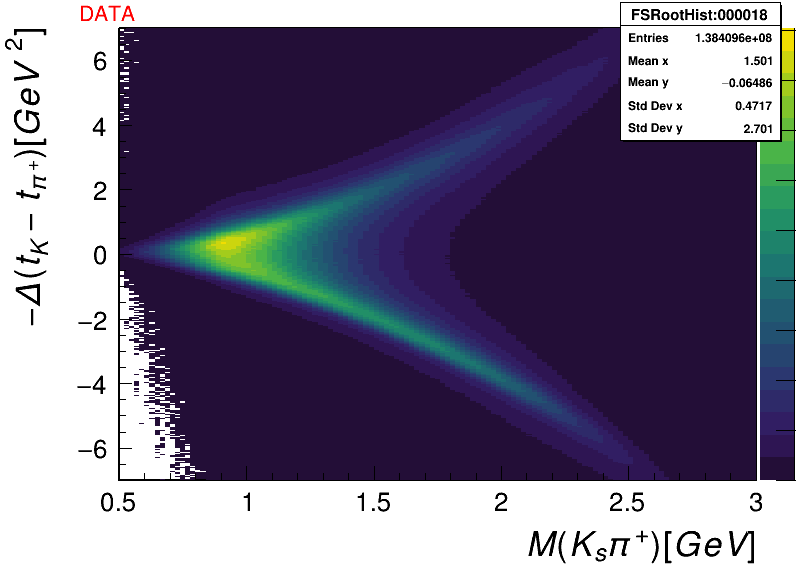

    CREATING HISTOGRAM... FSRootHist:000018   OKAY           (entries = 138409617)


Info in <TCanvas::Print>: pdf file plots/mand-tKPIvsMksLamb_DATA.pdf has been created
Info in <TCanvas::Print>: png file plots/mand-tKPIvsMksLamb_DATA.png has been created


In [ ]:
from tkinter import Y
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = ''
XaxisLabel = 'M(K_{s} \pi^{+}) [GeV]'
YaxisLabel = '-\Delta(t_{K} - t_{\pi^{+}}) [GeV^{2}]'


# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats box with entries, mean, RMS, etc. (gluex_style toggles this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    # canvas = ROOT.TCanvas('c', 'c', 1600, 600)  # Wider canvas
    # canvas.Divide(2, 1)  # 2 columns, 1 row
    # canvas.SetLeftMargin(0.15)
    # canvas.SetRightMargin(0.15)

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # hist_mandT_2D_a_DATA
    # hist_mandT_2D_a_ACCEPTED
    # hist_mandT_2D_a_THROWN

    print(hist_mandT_2D_a_DATA)
    hist_mandT_2D_a_DATA.SetTitle(plotTitle)
    hist_mandT_2D_a_DATA.SetStats(True)
    hist_mandT_2D_a_DATA.GetXaxis().SetTitle(XaxisLabel)
    hist_mandT_2D_a_DATA.GetYaxis().SetTitle(YaxisLabel)
    hist_mandT_2D_a_DATA.Draw('colz')
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextAlign(13)
    latex.SetTextColor(2)
    latex.DrawLatex(0.10, 0.99, "DATA")

    
    img_path = 'plots/mand-tKPIvsMksPip_DATA'
    # img_path = 'plots/mand-tKPIvsMpiLamb'
    # img_path = 'plots/mand-tKPIvsMksLamb'
    canvas.Update()
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## EVENT SELECTION

### Beam energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

canvas = ROOT.TCanvas('c', 'c', 800, 600)


h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plots/beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### dE/dx

In [ ]:
## put code here

### RFDeltaT

In [ ]:
from IPython.display import Image, display
import ROOT, os

latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'RFDeltaT (ns)'

# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():
    gluex_style()
    ROOT.gStyle.SetOptStat(1111)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)


    h1.SetLineColor(ROOT.kBlue)
    h1.SetLineStyle(1)
    h1.GetYaxis().SetTitle("events")
    h1.GetXaxis().SetTitle(axisLabel)
    h1.SetTitle(plotTitle)
    h1.Draw("hist")

    # for accidental subtraction:
    h_bg = h2.Clone("h_bg")
    # h_bg.Add(h3)
    h_bg.SetLineColor(ROOT.kRed)
    h_bg.SetLineStyle(1)
    h_bg.GetYaxis().SetTitle("events")
    h_bg.GetXaxis().SetTitle(axisLabel)
    h_bg.SetTitle(plotTitle)
    h_bg.Draw("same hist")

    legend1 = ROOT.TLegend(0.60, 0.86, 0.92, 0.98)
    legend1.AddEntry(h1, "Prompt signal", "l")
    legend1.AddEntry(h_bg, "Out-of-time peaks", "l")
    legend1.AddEntry(h_bg, "scaled by 1./6.", "l")
    legend1.Draw("same")

    canvas.cd(0)
    img_path = 'plots/RF_deltaT_sideBand'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()


### Mass vs. energy_measured

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'
XaxisLabel = '(E_{\pi^{+}} /  E_{\pi^{-}})'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')

    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' legend', 'l')
    # legend1.Draw('same')

    img_path = 'plots/ks_m_VS_measEnergy_TEST2'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Flight sig.

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ROOT.FSHistogram.clearHistogramCache()


    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('')

    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' ks flightSig variable', 'l')

    legend1.Draw('same')

    img_path = 'plots/VeeLP1'
    # canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 2D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)


    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF-Event'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 1D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

## MASS PLOTS

### KShort

Formula string: (([p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))/(sqrt(2*pi)*[p2])+[p3]*exp(-0.5*((x-[p4])/[p5])*((x-[p4])/[p5]))/(sqrt(2*pi)*[p5])+[p6]+[p7]*x)/0.0005)
Formula string: (([gaus1_amplitude]*exp(-0.5*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution])*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution]))/(sqrt(2*pi)*[gaus1_sigma_detectorResolution])+[GAUS2_AMPLITUDE]*exp(-0.5*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution])*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution]))/(sqrt(2*pi)*[GAUS2_SIGMA_detectorResolution])+[Linear_offset]+[Linear_factor]*x)/0.0005)
Fit valid: False
Fit status code: 4
Covariance matrix status: 2
Chi2: 236.98611125273754
NDF: 92
Chi2/NDF: 2.575935991877582
Index Name                                Value      Error
------------------------------------------------------------
0     gaus1_amplitude                   2.01128    0.37142
1     gaus1_mean                        0.28250    0.03461
2     gaus1_sigma_detectorResolution   -0.17948    

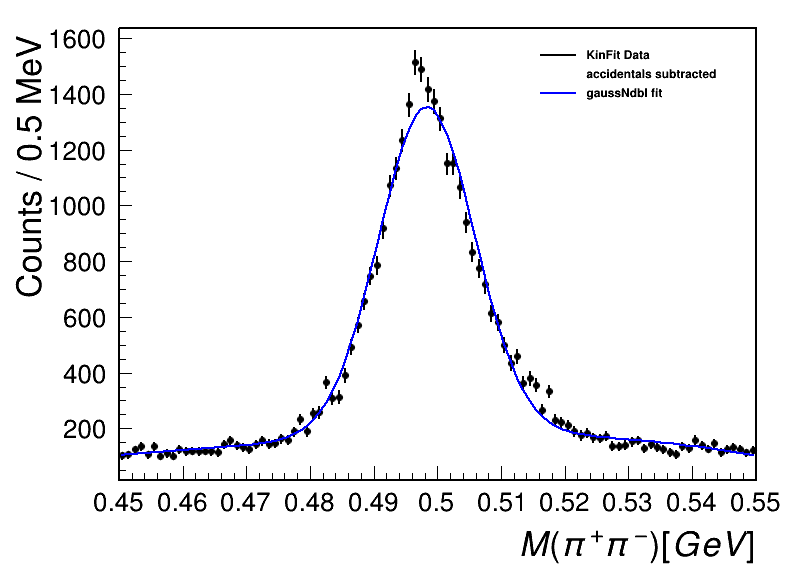

Info in <TCanvas::Print>: pdf file plots/ks_m_fit_gauss_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/ks_m_fit_gauss_TEST.png has been created


In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'M(\pi^{+} \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",0.3,0.7)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.18137)
    gaussNdbl.SetParameter("gaus1_mean", 0.4976)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.06)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00025)
    gaussNdbl.SetParameter("GAUS2_MEAN", 0.4976)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.01)
    # gaussNdbl.FixParameter(3, 22.00)
    # gaussNdbl.FixParameter(4, 1.115683)
    # gaussNdbl.FixParameter(5, 0.0045)

    gaussNdbl.SetParameter("Linear_offset", 0.000)
    gaussNdbl.SetParameter("Linear_factor", 1.00)
    # gaussNdbl.FixParameter(6, 10.658)
    # gaussNdbl.RixParameter(7, -10.222)

    hist_ks_reduced.SetStats(False)
    hist_ks_reduced.SetLineColor(ROOT.kBlack)
    hist_ks_reduced.SetLineStyle(1)
    hist_ks_reduced.SetLineWidth(2)
    hist_ks_reduced.GetXaxis().SetTitle(axisLabel)
    hist_ks_reduced.GetYaxis().SetTitle("Counts / 0.5 MeV")
    hist_ks_reduced.Draw("")
    hist_ks_reduced.Fit(gaussNdbl, "RSQ")
    fit_result = hist_ks_reduced.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")


    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(hist_ks_reduced, ' KinFit Data', 'l')
    legend1.AddEntry(hist_ks_reduced, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    legend1.Draw("same hist")

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/ks_m_fit_gauss_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda

Formula string: (([p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))/(sqrt(2*pi)*[p2])+[p3]*exp(-0.5*((x-[p4])/[p5])*((x-[p4])/[p5]))/(sqrt(2*pi)*[p5])+[p6]+[p7]*x)/0.0005)
Formula string: (([gaus1_amplitude]*exp(-0.5*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution])*((x-[gaus1_mean])/[gaus1_sigma_detectorResolution]))/(sqrt(2*pi)*[gaus1_sigma_detectorResolution])+[GAUS2_AMPLITUDE]*exp(-0.5*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution])*((x-[GAUS2_MEAN])/[GAUS2_SIGMA_detectorResolution]))/(sqrt(2*pi)*[GAUS2_SIGMA_detectorResolution])+[Linear_offset]+[Linear_factor]*x)/0.0005)
Fit valid: True
Fit status code: 0
Covariance matrix status: 3
Chi2: 88.9535416871974
NDF: 56
Chi2/NDF: 1.5884561015570964
Index Name                                Value      Error
------------------------------------------------------------
0     gaus1_amplitude                   0.00502    0.00063
1     gaus1_mean                        1.11783    0.00015
2     gaus1_sigma_detectorResolution    0.00479    0.

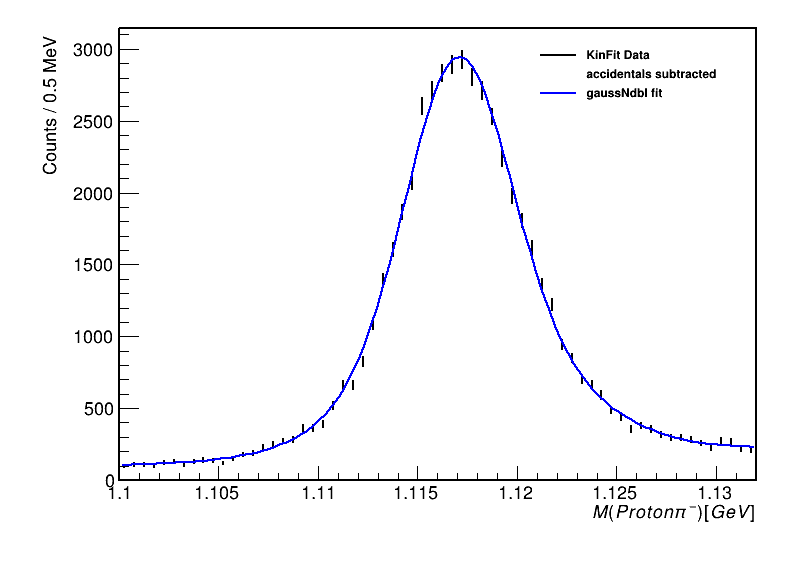

Info in <TCanvas::Print>: pdf file plots/Lambda_m_sb_gaussNdbl_TEST.pdf has been created
Info in <TCanvas::Print>: png file plots/Lambda_m_sb_gaussNdbl_TEST.png has been created


In [13]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",1.1,1.132)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.18137)
    gaussNdbl.SetParameter("gaus1_mean", 1.17344)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.06407)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00025)
    gaussNdbl.SetParameter("GAUS2_MEAN", 1.11603)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.00159)
    # gaussNdbl.FixParameter(3, 22.00)
    # gaussNdbl.FixParameter(4, 1.115683)
    # # gaussNdbl.FixParameter(5, 0.0045)

    gaussNdbl.SetParameter("Linear_offset", 10.658)
    gaussNdbl.SetParameter("Linear_factor", -10.222)
    # gaussNdbl.FixParameter(6, 10.658)
    # gaussNdbl.RixParameter(7, -10.222)

    hist_lamb_reduced.SetStats(False)
    hist_lamb_reduced.SetLineColor(ROOT.kBlack)
    # hist_lamb_reduced.SetLineStyle(1)
    # hist_lamb_reduced.SetLineWidth(2)
    hist_lamb_reduced.GetXaxis().SetTitle(axisLabel)
    hist_lamb_reduced.GetYaxis().SetTitle("Counts / 0.5 MeV")
    hist_lamb_reduced.Draw("")
    hist_lamb_reduced.Fit(gaussNdbl, "RSQ")
    fit_result = hist_lamb_reduced.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")

    # hMC.SetStats(False)
    # # hMC.SetMarkerColor(ROOT.kBlue)
    # # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerStyle(0)
    # # hMC.SetMarkerSize(0.8)
    # hMC.SetMarkerSize(0)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(1)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Scale(3.8)
    # hMC.Draw("same hist")
    # # hMC.Fit(voigtian, "RQ")
    # # voigtian.Draw("same")

    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(hist_lamb_reduced, ' KinFit Data', 'lP')
    legend1.AddEntry(hist_lamb_reduced, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    legend1.Draw("same hist")

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/Lambda_m_sb_gaussNdbl_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda sb (other, mass?)

In [ ]:

from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'M(Proton \pi^{-}) [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats box with entries, mean, RMS, etc. (gluex_style toggles this off by default)
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    img_path = 'plots/Lambda_m_sidebands'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda missing mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '#Lambda Missing Mass'
axisLabel = '#Lambda Missing Mass'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kMagenta)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('same, hist')


    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/decayingLambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### K*

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data'
axisLabel = 'Mass (K_{s} \pi^{+})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    ROOT.FSHistogram.clearHistogramCache()
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    gaussNdbl = ROOT.TF1("gaussNdbl","((gausn(0) + gausn(3) + [6] + [7]*x) / 0.0005)",0.0,2.5)
    gaussNdbl.SetLineColor(ROOT.kBlue)
    gaussNdbl.SetLineWidth(2)
    gaussNdbl.SetLineStyle(1)
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())
    gaussNdbl.SetParName(0, "gaus1_amplitude")
    gaussNdbl.SetParName(1, "gaus1_mean")
    gaussNdbl.SetParName(2, "gaus1_sigma_detectorResolution")
    gaussNdbl.SetParName(3, "GAUS2_AMPLITUDE")
    gaussNdbl.SetParName(4, "GAUS2_MEAN")
    gaussNdbl.SetParName(5, "GAUS2_SIGMA_detectorResolution")
    gaussNdbl.SetParName(6, "Linear_offset")
    gaussNdbl.SetParName(7, "Linear_factor")
    print("Formula string:", gaussNdbl.GetFormula().GetExpFormula())

    gaussNdbl.SetParameter("gaus1_amplitude", 0.18137)
    gaussNdbl.SetParameter("gaus1_mean", 0.892)
    gaussNdbl.SetParameter("gaus1_sigma_detectorResolution", 0.06)
    # gaussNdbl.FixParameter(0, 00.003)
    # gaussNdbl.FixParameter(1, 1.115683)
    # gaussNdbl.FixParameter(2, 0.00005)

    gaussNdbl.SetParameter("GAUS2_AMPLITUDE", 0.00025)
    gaussNdbl.SetParameter("GAUS2_MEAN", 0.892)
    gaussNdbl.SetParameter("GAUS2_SIGMA_detectorResolution", 0.01)
    # gaussNdbl.FixParameter(3, 22.00)
    # gaussNdbl.FixParameter(4, 1.115683)
    # gaussNdbl.FixParameter(5, 0.0045)

    gaussNdbl.SetParameter("Linear_offset", 0.000)
    gaussNdbl.SetParameter("Linear_factor", 1.00)
    # gaussNdbl.FixParameter(6, 10.658)
    # gaussNdbl.RixParameter(7, -10.222)

    hist_k892_reduced.SetStats(False)
    hist_k892_reduced.SetLineColor(ROOT.kBlack)
    hist_k892_reduced.SetLineStyle(1)
    hist_k892_reduced.SetLineWidth(2)
    hist_k892_reduced.GetXaxis().SetTitle(axisLabel)
    hist_k892_reduced.GetYaxis().SetTitle("Counts / 0.5 MeV")
    hist_k892_reduced.Draw("")
    # hist_k892_reduced.Fit(gaussNdbl, "RSQ")
    fit_result = hist_k892_reduced.Fit(gaussNdbl, "RSQ")
    print("Fit valid:", fit_result.IsValid())
    print("Fit status code:", fit_result.Status())
    print("Covariance matrix status:", fit_result.CovMatrixStatus())
    print("Chi2:", fit_result.Chi2())
    print("NDF:", fit_result.Ndf())
    print("Chi2/NDF:", fit_result.Chi2() / fit_result.Ndf() if fit_result.Ndf() else float('inf'))
    gaussNdbl.Draw("same")

    # hMC.SetStats(False)
    # # hMC.SetMarkerColor(ROOT.kBlue)
    # # hMC.SetMarkerStyle(4)
    # hMC.SetMarkerStyle(0)
    # # hMC.SetMarkerSize(0.8)
    # hMC.SetMarkerSize(0)
    # hMC.SetLineColor(ROOT.kBlue)
    # hMC.SetLineStyle(1)
    # hMC.SetLineWidth(2)
    # hMC.SetFillColor(ROOT.kBlue)
    # hMC.SetFillStyle(3002)
    # hMC.GetXaxis().SetTitle(axisLabel)
    # hMC.Scale(3.8)
    # hMC.Draw("same hist")
    # # hMC.Fit(voigtian, "RQ")
    # # voigtian.Draw("same")

    # hTHROWN.

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(hist_k892_reduced, ' KinFit Data', 'l')
    legend1.AddEntry(hist_k892_reduced, ' accidentals subtracted', "")
    legend1.AddEntry(gaussNdbl, ' gaussNdbl fit', 'l')
    legend1.Draw("same hist")

    print(f"{'Index':<5} {'Name':<30} {'Value':>10} {'Error':>10}")
    print("-" * 60)
    for i in range(gaussNdbl.GetNpar()):
        name = gaussNdbl.GetParName(i)
        val = gaussNdbl.GetParameter(i)
        err = gaussNdbl.GetParError(i)
        print(f"{i:<5} {name:<30} {val:>10.5f} {err:>10.5f}")

    img_path = 'plots/KsPip_m_fit_gauss_TEST'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Baryon system: kShort Lambda

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} #Lambda)'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.SetLineStyle(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist')

    legend1 = ROOT.TLegend(0.25, 0.80, 0.60, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'initial cuts', 'l')
    legend1.AddEntry(h2, 'all cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### π+

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Data: \pi^{+} Mass (primary)'
axisLabel = 'Mass (\pi^{+}) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    
    h4.SetStats(False)
    h4.SetLineColor(ROOT.kRed)
    h4.SetLineStyle(1)
    h4.SetLineWidth(2)
    h4.SetFillColor(ROOT.kRed)
    h4.SetFillStyle(3002)
    h4.GetXaxis().SetTitle(axisLabel)
    h4.Draw("hist")

    hMC.SetStats(False)
    hMC.SetMarkerColor(ROOT.kBlue)
    hMC.SetMarkerStyle(4)
    hMC.SetMarkerSize(0.8)
    hMC.SetLineColor(ROOT.kBlue)
    hMC.SetLineStyle(8)
    hMC.SetLineWidth(2)
    hMC.SetFillColor(ROOT.kBlue)
    hMC.SetFillStyle(3002)
    hMC.GetXaxis().SetTitle(axisLabel)
    hMC.Draw("same, pl hist")
    hMC.Scale(2.79)

    legend1 = ROOT.TLegend(0.67, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Analysis launch cuts only', 'pl')
    # legend1.AddEntry(h2, ' Initial cuts', 'l')
    # legend1.AddEntry(h3, ' Initial, #Lambda flightSig', 'pl')
    # legend1.AddEntry(h4, ' Initial, #Lambda flightSig, #Lambda mass sel.', 'l')
    legend1.AddEntry(h4, ' Data (all cuts)', 'l')
    legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    legend1.Draw('same')

    img_path = 'plots/PiPlus_m_DATA-MC'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



### Final state particles: ks π+ Λ

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K_{s} \pi^{+} #Lambda)'
axisLabel = 'Mass (K_{s} \pi^{+} p \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



## 2D plots

### Dalitz

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(\pi^{+} \pi^{-} \pi^{+})^{2} [GeV]^{2}]'
XaxisLabel = 'M(p \pi^{-} \pi^{+})^{2} [GeV]^{2}]'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')

    # hMC.SetStats(False)
    # hMC.GetXaxis().SetTitle(XaxisLabel)
    # hMC.GetYaxis().SetTitle(YaxisLabel)
    # hMC.Draw('colz')


    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Data', 'l')
    # legend1.AddEntry(hMC, ' Signal MC', 'pl')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m2'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Dalitz EFFICIENCY

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Efficiency MC - log scale'
YaxisLabel = 'M(\pi^{+} \pi^{-} p \pi^{-})^{2} (GeV)^{2}'
XaxisLabel = 'M(\pi^{+} \pi^{-} \pi^{+})^{2} (GeV)^{2}'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# MCfileNameALLPLUGINS
# MCfileNameRXNPLUGINONLY
# THROWNfileNameALLPLUGINS
# THROWNfileNameRXNPLUGINONLY

def plot_hist():

    gluex_style()
    ROOT.gStyle.SetOptStat(1111)  # show stats (gluex_style hides this off by default)
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    canvas.SetLogx()
    canvas.SetLogy()
    
    dalitz_kspipVSlambpip_ACCEPTED = ROOT.FSHistogram.getTH2F(MCfileNameRXNPLUGINONLY, treeName, f"MASS2({DecayingKShort},{DecayingLambda}):MASS2({DecayingKShort},{PiPlus1})", "(100, 0.2, 10.2, 100, 2.2, 23.0)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    dalitz_kspipVSlambpip_THROWN = ROOT.FSHistogram.getTH2F(THROWNfileNameRXNPLUGINONLY, treeName, f"MCMASS2({DecayingKShort},{DecayingLambda}):MCMASS2({DecayingKShort},{PiPlus1})", "(100, 0.2, 10.2, 100, 2.2, 23.0)", "CUT()") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"
    dalitz_kspipVSlambpip_EFFICIENCY = dalitz_kspipVSlambpip_ACCEPTED.Clone("dalitz_kspipVSlambpip_EFFICIENCY")
    dalitz_kspipVSlambpip_EFFICIENCY.Divide(dalitz_kspipVSlambpip_THROWN)
    dalitz_kspipVSlambpip_EFFICIENCY.SetTitle(plotTitle)
    dalitz_kspipVSlambpip_EFFICIENCY.SetStats(True)
    dalitz_kspipVSlambpip_EFFICIENCY.GetXaxis().SetTitle(XaxisLabel)
    dalitz_kspipVSlambpip_EFFICIENCY.GetYaxis().SetTitle(YaxisLabel)
    dalitz_kspipVSlambpip_EFFICIENCY.Draw('colz')

    # legend1 = ROOT.TLegend(0.80, 0.88, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(dalitz_kspipVSlambpip_THROWN, 'linear scale', '')
    # legend1.Draw('same')
    latex.SetNDC()
    latex.SetTextSize(0.04)
    latex.SetTextColor(ROOT.kRed)
    latex.DrawLatex(0.15, 0.96, plotTitle)

    img_path = 'plots/dalitz_KsPipVSLambPip_EFFICIENCY_MC_log'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()


### 2D mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(K_{s} \pi^{+}) [GeV]'
XaxisLabel = 'M(#Lambda \pi^{+}) [GeV]'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    gluex_style()
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    ROOT.FSHistogram.clearHistogramCache() 
    
    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    canvas.SetRightMargin(.15)    



    # legend1 = ROOT.TLegend(0.60, 0.82, 0.92, 0.92) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' Data (all cuts)', 'l')
    # legend1.AddEntry(hMC, ' Signal MC (all cuts)', 'pl')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()